# Datan analysointi K2019 - Tehtävät kerta 5

Palauta Optiman palautuslaatikkoon viimeistään to 14.2. Kirjoita palautuslaatikon kommenttikenttään, mitkä tehtävät olet tehnyt kokonaan/osittain.

Opiskelijan nimi:


## 1. Autoja

Tiedostossa https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta5/passatvariant.csv on joitain sarakkeita Trafin tiedoissa olevista Passat Variant -autoista.

Lue tiedot DataFrameen ja tee  
* histogrammit käyttöönottovuodesta, matkamittarin lukemasta ja CO2-päästöistä
* jointplot käyttöönottovuodesta, auton pituudesta, massasta ja CO2-päästöistä
* violinplot käyttöönottovuodesta käyttövoiman mukaan. Ota mukaan vain käyttövoiman arvot 1.0 = bensiini, 2.0 = diesel

Index(['Unnamed: 0', 'kayttoonottovuosi', 'ovienLukumaara',
       'istumapaikkojenLkm', 'omamassa', 'ajonKokPituus', 'iskutilavuus',
       'suurinNettoteho', 'sahkohybridi', 'vaihteisto', 'Co2',
       'matkamittarilukema', 'kayttovoima'],
      dtype='object')


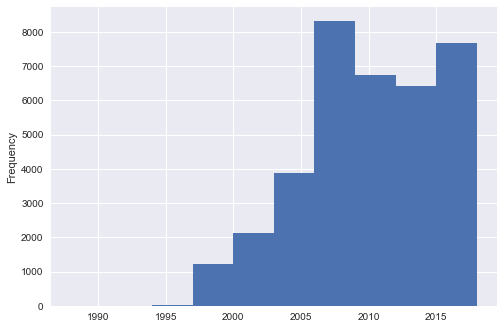

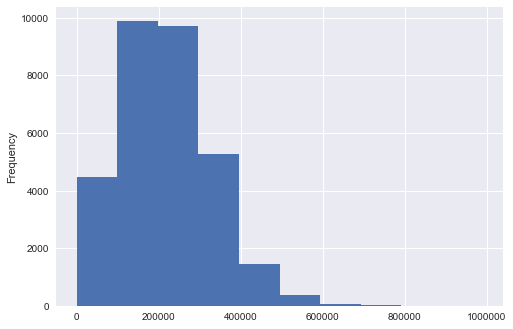

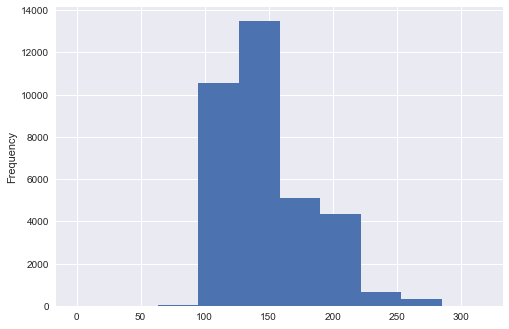

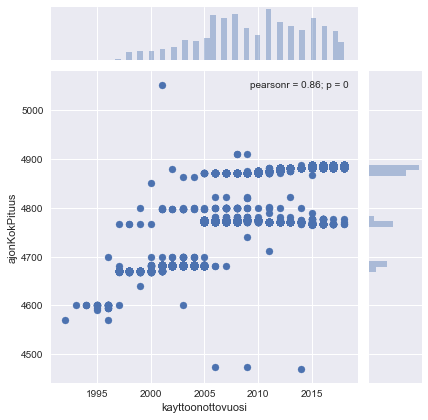

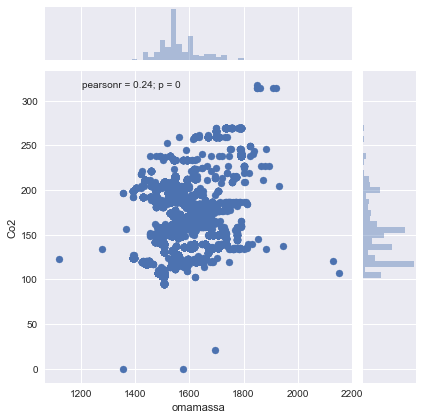

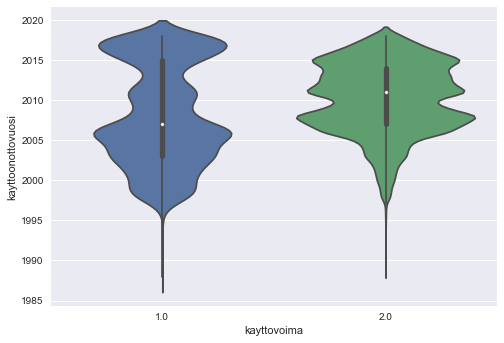

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta5/passatvariant.csv')

print(df.columns)

df['kayttoonottovuosi'].plot.hist()
plt.show()

df[df['matkamittarilukema']<1000000]['matkamittarilukema'].plot.hist()
plt.show()

df['Co2'].plot.hist()
plt.show()


sns.jointplot('kayttoonottovuosi', 'ajonKokPituus', data=df)
plt.show()

sns.jointplot('omamassa', 'Co2', data=df)
plt.show()

#jne

sns.violinplot(x='kayttovoima', y='kayttoonottovuosi' ,split=True,  data=df[df['kayttovoima'].isin({1.0,2.0})])
plt.show()


## 2. Muotoilut
Alla on annettu kaavion luontikoodi (käyttäen np-taulukoita). Tee kaaviosta yksityiskohtaisesti alla olevan mallin mukainen. Tutki [matplotlibin speksistä](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot), miten kaavion osia muotoillaan.  

![malli2](https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta5/malli2.png)

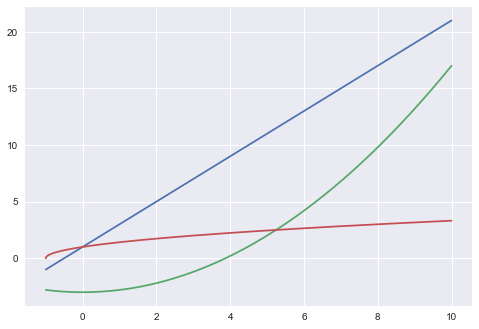

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


x = np.linspace(-1,10,1000)
y1 =  2*x +1
y2 = 0.2*x**2-3
y3 = (x+1)**0.5
fig, ax = plt.subplots()
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)

plt.show()

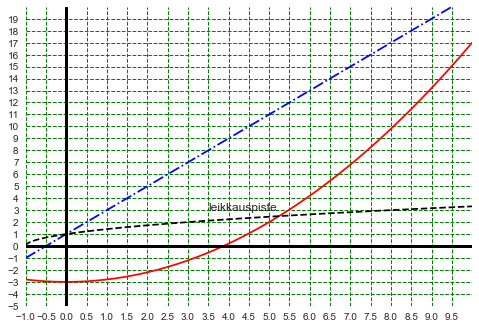

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x = np.linspace(-1,10,1000)
y1 =  2*x +1
y2 = 0.2*x**2-3
y3 = (x+1)**0.5
fig, ax = plt.subplots()


plt.plot(x, y1, 'b-.')
plt.plot(x, y2, 'r')
plt.plot(x, y3, 'k--')

plt.axis([-1,10,-5,20])

plt.xticks(np.arange(-1, 10, step=0.5))
plt.yticks(np.arange(-5, 20, step=1))
plt.grid(color='g', linestyle='--', linewidth=1)
plt.axhline(linewidth=3, color="k")
plt.axvline(linewidth=3, color="k")
plt.annotate('leikkauspiste', (3.5,3))
ax.set_facecolor("white")
plt.show()

## 3. Liikennetietoja
Tiedostossa https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta5/lam.csv on yhden päivän tietoja eräältä automaattiselta liikennemittausasemalta ([LAM](https://vayla.fi/avoindata/tietoaineistot/lam-tiedot)). Erotin on puolipiste.

Lue tiedot DataFrameen ja tutki sopivien kaavioiden avulla suunnan, ajoneuvoluokan ja kellonajan (esim tunti) vaikutusta nopeusjakaumaan.


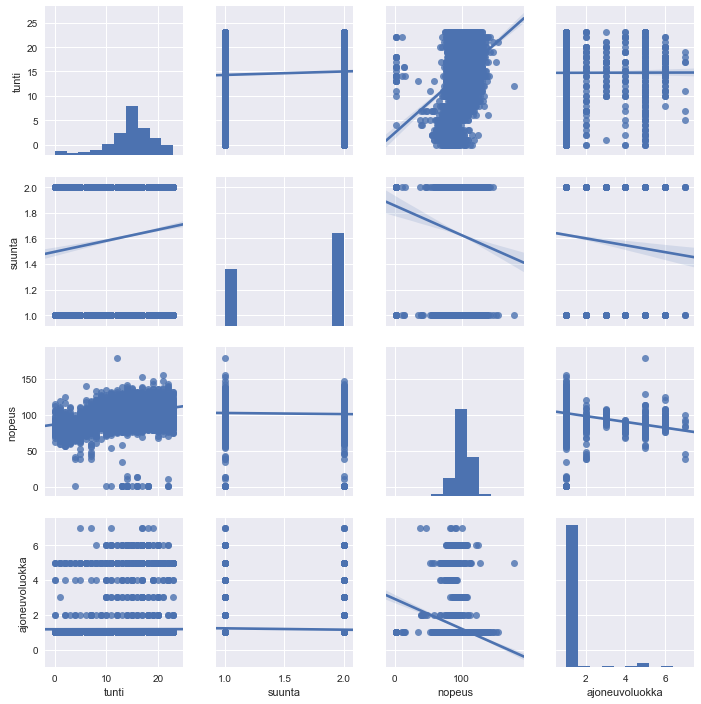

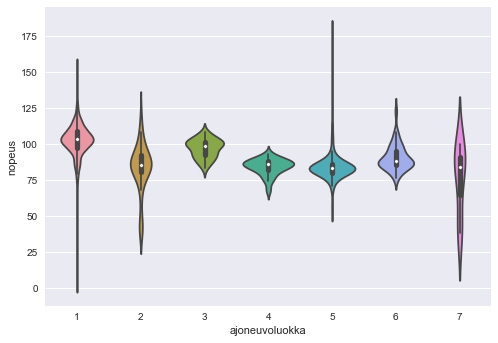

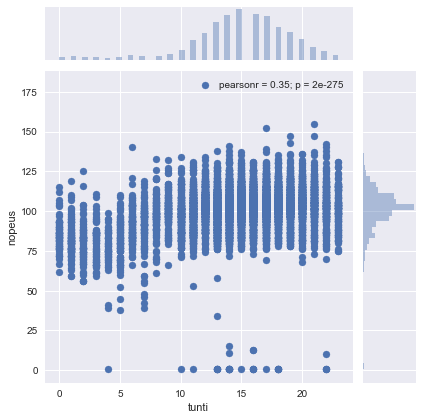

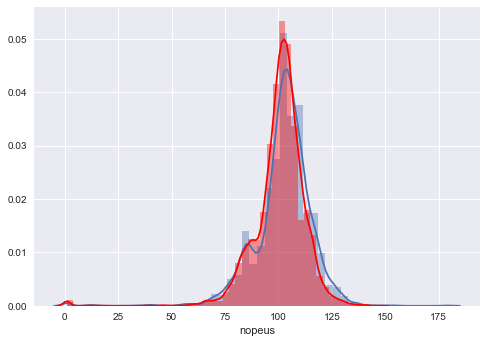

In [44]:
df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta5/lam.csv', sep=';')
df.head()

sns.pairplot(df[['tunti', 'suunta', 'nopeus', 'ajoneuvoluokka']], kind='reg')
plt.show()

sns.violinplot(x='ajoneuvoluokka', y='nopeus', data=df)
plt.show()

sns.jointplot(x='tunti', y='nopeus', data=df)
plt.show()



ax1 = sns.distplot(df[df['suunta']==1]['nopeus'])
sns.distplot(df[df['suunta']==2]['nopeus'], ax=ax1, color='r')
plt.show()


## 4. Sää

Lue tiedosto https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta5/saa.csv DataFrameen ja tee subplotia käyttäen 4 kaaviota (2 riviä, 2 saraketta):
* histogrammit heinäkuun päivittäsistä sademääristä vuosilta 2017 ja 2018 samaan kaavioon
* lumensyvyydet tammi-helmikuun päiviltä vuosilta 2018 ja 2019 samaan kaavioon (voit tehdä uuden sarakkeen, joka kertoo monesko päivä on vuodesta)
* regplot ylimmistä ja alimmista lämpötilosta vuoden 2019 tammikuulta
* laske DataFramen [diff](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.diff.html)-metodia käyttäen lumensyvyyden muutos joka päivälle. Tee sitten pylväskaavio näiden keskiarvosta kuukausittain vuodelle 2018.


Malli:  
![malli4](https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta5/malli4.png)


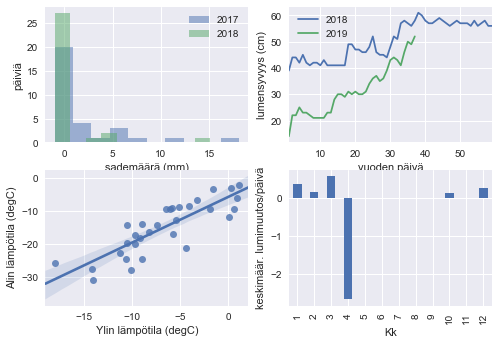

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta5/saa.csv')

# monesko päivä vuodesta (tammi-helmikuut)
df['vpaiva'] = (df['Kk']-1)*31+df['Pv']

plt.figure()  
ax1 = plt.subplot(2,2,1) 
df[(df['Vuosi']==2017) & (df['Kk']==7)]['Sademäärä (mm)'].plot.hist(ax=ax1, label='2017', alpha=0.5)
df[(df['Vuosi']==2018) & (df['Kk']==7)]['Sademäärä (mm)'].plot.hist(ax=ax1, label='2018',  alpha=0.5)
#plt.hist(df[(df['Vuosi']==2017) & (df['Kk']==7)]['Sademäärä (mm)'], label='2017')
#plt.hist(df[(df['Vuosi']==2018) & (df['Kk']==7)]['Sademäärä (mm)'], label='2018')
plt.xlabel('sademäärä (mm)')
plt.ylabel('päiviä')
plt.legend()




ax2 = plt.subplot(2,2,2) 
df[(df['Kk'].isin([1,2])) & (df['Vuosi'].isin([2018]))].plot(x='vpaiva', y='Lumensyvyys (cm)', label='2018', ax=ax2)
df[(df['Kk'].isin([1,2])) & (df['Vuosi'].isin([2019]))].plot(x='vpaiva', y='Lumensyvyys (cm)', label='2019', ax=ax2)
plt.ylabel('lumensyvyys (cm)')
plt.xlabel('vuoden päivä')


ax3 = plt.subplot(2,2,3) 
sns.regplot(x='Ylin lämpötila (degC)', y='Alin lämpötila (degC)', data=df[(df['Kk']==1) & (df['Vuosi']==2019)])

ax4 = plt.subplot(2,2,4) 

df['muutos'] = df['Lumensyvyys (cm)'].diff()
df2 = df[df['Vuosi']==2018].groupby(df['Kk'])['muutos'].mean()
df2.plot.bar()
plt.ylabel('keskimäär. lumimuutos/päivä')

plt.show()


## 5. Jalkapalloa
Käytä 4-kerran 4-tehtävän ratkaisua/malliratkaisua hyväksi ja lue yhteen DataFrameen (1 ottelu/rivi) kaikki ottelutulokset kansiossa  
https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta4/epl/  
olevista tiedostoista  
`season-0910_csv.csv, season-1011_csv.csv, ... , season-1819_csv.csv`   

Suodata sitten yhden joukkueen ottelut ja laske uusi sarake, jossa on joukkueen saamat pisteet jokaisesta ottelusta (voitto = 3p, tasapeli 1p, tappio 0p)

Laske sitten pistekeskiarvot ottelun erotuomarin mukaan ryhmiteltynä ja lajiteltuna, ja tulosta näistä pylväskaavio. 

Malli:  
![tuomari](https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta5/tuomari.png)

Referee
G Scott          3.000000
P Tierney        3.000000
N Swarbrick      2.800000
S Attwell        2.714286
R Madley         2.583333
R East           2.500000
M Jones          2.470588
C Foy            2.470588
J Moss           2.450000
L Mason          2.352941
P Dowd           2.333333
H Webb           2.294118
M Oliver         2.272727
C Pawson         2.250000
A Taylor         2.142857
L Probert        2.090909
A Marriner       2.000000
M Dean           1.945946
K Friend         1.800000
M Atkinson       1.757576
M Clattenburg    1.500000
M Halsey         1.500000
A Wiley          1.250000
P Walton         0.500000
S Bennett        0.000000
Name: pisteet, dtype: float64


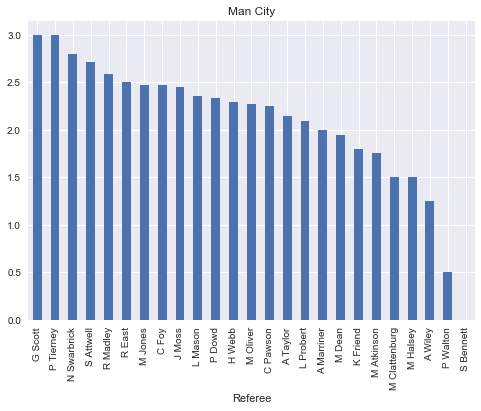

In [38]:
import matplotlib.pyplot as plt
dfall =  pd.DataFrame()


team = 'Man City'

for i in range(10,20):
  kausi = ('0' if i==10 else '')+str(i-1)+str(i)
  dfkausi = pd.read_csv('https://student.labranet.jamk.fi/~varpe/datananalk2019/kerta4/epl/season-'+ kausi +'_csv.csv')
  dfall = pd.concat([dfall,dfkausi])


# otetaan vain kyseisen joukkueen pelit
dfall = dfall[(dfall['HomeTeam']==team) | (dfall['AwayTeam']==team)]


dfall['pisteet'] = 1*((dfall['FTR']=='D')) + 3*((dfall['HomeTeam']==team) & (dfall['FTR']=='H')) + 3* ((dfall['AwayTeam']==team) & (dfall['FTR']=='A'))

dfr = dfall['pisteet'].groupby(dfall['Referee']).mean().sort_values(ascending=False)

print(dfr)


ax  = dfr.plot.bar()
ax.set_title(team)
plt.show()

